<a href="https://colab.research.google.com/github/maverick020603/Notes/blob/main/Minor_Project_%3E_Rohan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install GitPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.6 MB/s eta 0:00:00


In [ ]:
! git clone https://github.com/maverick020603/VERIS-COPY.git

Cloning into 'VERIS-COPY'...
remote: Enumerating objects: 156430, done.
remote: Total 156430 (delta 0), reused 0 (delta 0), pack-reused 156430
Receiving objects: 100% (156430/156430), 1.06 GiB | 19.18 MiB/s, done.
Resolving deltas: 100% (149838/149838), done.


In [ ]:
!pip install verispy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 4.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from verispy import VERIS

In [ ]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
import os
import glob
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import json
from verispy import VERIS
import pprint
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
from chart_studio.plotly import plot, iplot
import chart_studio

In [ ]:
data_dir = '/content/VERIS-COPY/data/json/validated'
v =  VERIS(json_dir=data_dir) #creates a veris object
veris_df = v.json_to_df(verbose=True) #creates a dataframe from the veris object

Found 9161 json files.
Loading schema
Loading JSON files to DataFrame.


100%|██████████| 9161/9161 [00:01<00:00, 7342.06it/s]


Finished loading JSON files to dataframe.
Dropped 5 rows with duplicated incident_id values.
Building DataFrame with enumerations.
Building enumeration columns.


  5%|▌         | 9/175 [00:00<00:03, 55.32it/s]/usr/local/lib/python3.9/dist-packages/verispy/veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
/usr/local/lib/python3.9/dist-packages/verispy/veris.py:196: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  comb_df[newvarname] = raw_df[col].apply(lambda x: var_amt_enum_checker(x, item, variety_or_amt))
/usr/local/lib/python3.9/dist-packages/verispy/veris.py:196: PerformanceWarning

Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame


In [ ]:
veris_df.shape

(9156, 2443)

In [ ]:
veris_df.head(5)

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.YER,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZEC,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id
0,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Brewhouse and Kitchen
1,False,False,False,False,False,False,False,True,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,TX,American Income Life
2,False,True,False,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA,WeWork
3,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Rajasthan Government
4,False,False,False,False,False,True,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,TX,IntraCare North Hospital


In [ ]:
veris_df.columns

Index(['action.Environmental', 'action.Error', 'action.Hacking',
       'action.Malware', 'action.Misuse', 'action.Physical', 'action.Social',
       'action.Unknown', 'action.environmental.notes',
       'action.environmental.variety.Deterioration',
       ...
       'victim.revenue.iso_currency_code.YER',
       'victim.revenue.iso_currency_code.ZAR',
       'victim.revenue.iso_currency_code.ZEC',
       'victim.revenue.iso_currency_code.ZMK',
       'victim.revenue.iso_currency_code.ZWD', 'victim.secondary.amount',
       'victim.secondary.notes', 'victim.secondary.victim_id', 'victim.state',
       'victim.victim_id'],
      dtype='object', length=2443)

In [ ]:
df_actors_internal = v.enum_summary(veris_df, 'actor.internal.variety', by='actor')
df_actors_external = v.enum_summary(veris_df, 'actor.external.variety', by='actor')

In [ ]:
df_actors_combined = pd.concat([df_actors_internal, df_actors_external])
df_actors_combined.head(10)

,by,enum,x,n,freq
0,actor.External,End-user,56,109.0,0.51376
1,actor.External,System admin,14,109.0,0.12844
2,actor.External,Cashier,11,109.0,0.10092
3,actor.External,Other,10,109.0,0.09174
4,actor.External,Executive,6,109.0,0.05505
5,actor.External,Manager,6,109.0,0.05505
6,actor.External,Finance,3,109.0,0.02752
7,actor.External,Developer,2,109.0,0.01835
8,actor.External,Call center,1,109.0,0.00917
9,actor.External,Doctor or nurse,1,109.0,0.00917


In [ ]:
df_actors_combined.to_csv('actors_combined.csv', sep='\t')

In [ ]:
df = pd.read_csv("/content/actors_combined")

In [ ]:
df.head(54)

,Unnamed: 0,by,enum,x,n,freq
0,0,actor.External,End-user,56,109,0.51376
1,1,actor.External,System admin,14,109,0.12844
2,2,actor.External,Cashier,11,109,0.10092
3,3,actor.External,Other,10,109,0.09174
4,4,actor.External,Executive,6,109,0.05505
5,5,actor.External,Manager,6,109,0.05505
6,6,actor.External,Finance,3,109,0.02752
7,7,actor.External,Developer,2,109,0.01835
8,8,actor.External,Call center,1,109,0.00917
9,9,actor.External,Doctor or nurse,1,109,0.00917


In [ ]:
df.isnull().sum()

Unnamed: 0    0
by            0
enum          0
x             0
n             0
freq          0
dtype: int64

In [ ]:
df['by'].unique()

array(['actor.External', 'actor.Internal', 'actor.Partner',
       'actor.Unknown'], dtype=object)

In [ ]:
df['enum'].unique()

array(['End-user', 'System admin', 'Cashier', 'Other', 'Executive',
       'Manager', 'Finance', 'Developer', 'Call center',
       'Doctor or nurse', 'Human resources', 'Auditor', 'Guard',
       'Helpdesk', 'Maintenance', 'Unknown', 'Organized crime',
       'Unaffiliated', 'Activist', 'State-affiliated', 'Former employee',
       'Nation-state', 'Customer', 'Force majeure', 'Competitor',
       'Acquaintance', 'Terrorist'], dtype=object)

In [ ]:
# Compute statistics
print("Kurtosis (Fisher's definition)")
df.kurtosis()

Kurtosis (Fisher's definition)


<ipython-input-20-abe6974f82f7>:4: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurtosis()


Unnamed: 0    -1.138535
x             45.236320
n             -0.550014
freq          13.829446
dtype: float64

In [ ]:
X = df.drop('enum', axis = 1)
y = df['enum']

In [ ]:
y

0              End-user
1          System admin
2               Cashier
3                 Other
4             Executive
             ...       
115               Other
116    State-affiliated
117           Terrorist
118        Unaffiliated
119             Unknown
Name: enum, Length: 120, dtype: object

In [ ]:
#spliting the dataset to work on train and test


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Encoding the labels
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df['enum'] = labelencoder.fit_transform(df['by'])

In [ ]:
df[['by', 'enum']].value_counts()

by              enum
actor.External  0       30
actor.Internal  1       30
actor.Partner   2       30
actor.Unknown   3       30
dtype: int64

In [ ]:
df.head()

,Unnamed: 0,by,enum,x,n,freq
0,0,actor.External,0,56,109,0.51376
1,1,actor.External,0,14,109,0.12844
2,2,actor.External,0,11,109,0.10092
3,3,actor.External,0,10,109,0.09174
4,4,actor.External,0,6,109,0.05505


In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.3 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
import pandas as pd

In [ ]:
scaler=StandardScaler()

In [ ]:
df.head()

,Unnamed: 0,by,enum,x,n,freq
0,0,actor.External,0,56,109,0.51376
1,1,actor.External,0,14,109,0.12844
2,2,actor.External,0,11,109,0.10092
3,3,actor.External,0,10,109,0.09174
4,4,actor.External,0,6,109,0.05505


In [ ]:
df['enum'].unique()

array([0, 1, 2, 3])

In [ ]:
X=df.drop(columns=["enum","by"])

In [ ]:
y=df["by"]

In [ ]:
y

0      actor.External
1      actor.External
2      actor.External
3      actor.External
4      actor.External
            ...      
115     actor.Unknown
116     actor.Unknown
117     actor.Unknown
118     actor.Unknown
119     actor.Unknown
Name: by, Length: 120, dtype: object

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
X

array([[-1.6887931 , -0.07803981, -0.49397862,  4.46762218],
       [-1.63180345, -0.19475216, -0.49397862,  0.75349641],
       [-1.57481381, -0.20308876, -0.49397862,  0.48822925],
       [-1.51782417, -0.20586762, -0.49397862,  0.3997426 ],
       [-1.46083452, -0.21698308, -0.49397862,  0.04608519],
       [-1.40384488, -0.21698308, -0.49397862,  0.04608519],
       [-1.34685524, -0.22531968, -0.49397862, -0.21927836],
       [-1.28986559, -0.22809855, -0.49397862, -0.30766862],
       [-1.23287595, -0.23087741, -0.49397862, -0.39615526],
       [-1.17588631, -0.23087741, -0.49397862, -0.39615526],
       [-1.11889666, -0.23087741, -0.49397862, -0.39615526],
       [-1.06190702, -0.23365628, -0.49397862, -0.48454552],
       [-1.00491738, -0.23365628, -0.49397862, -0.48454552],
       [-0.94792773, -0.23365628, -0.49397862, -0.48454552],
       [-0.89093809, -0.23365628, -0.49397862, -0.48454552],
       [-0.83394845,  0.08313439, -0.49397862, -0.48454552],
       [-0.7769588 ,  1.

In [ ]:
x = df.drop(['enum','by'], axis = 1)
y = df.loc[:,"enum"].values

In [ ]:
x

,Unnamed: 0,x,n,freq
0,0,56,109,0.51376
1,1,14,109,0.12844
2,2,11,109,0.10092
3,3,10,109,0.09174
4,4,6,109,0.05505
...,...,...,...,...
115,51,0,0,0.00000
116,52,0,0,0.00000
117,53,0,0,0.00000
118,54,0,0,0.00000


In [ ]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

#Logistic regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)



In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 4)
(80,)
(40, 4)
(40,)


In [ ]:
lr = LogisticRegression(solver='liblinear', max_iter = 1000) 
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
x_pred = lr.predict(x_train)



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, x_pred)

array([[19,  1,  0,  0],
       [ 0, 19,  0,  0],
       [ 0,  0, 21,  0],
       [ 0,  0,  0, 20]])

In [ ]:
#train score
score = accuracy_score(y_train, x_pred)
score

0.9875

In [ ]:
y_pred = lr.predict(x_test)



In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 9,  0,  0,  0],
       [ 1, 11,  0,  0],
       [ 0,  0,  9,  0],
       [ 0,  0,  0, 10]])

In [ ]:
#test score 
score = accuracy_score(y_pred, y_test)
score

0.975

In [ ]:
df_actors_combined.shape

(120, 5)

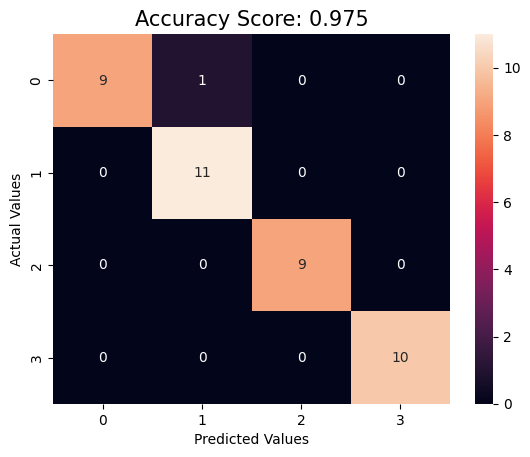

In [ ]:
cm1 = confusion_matrix(y_test, y_pred)
sns.heatmap(cm1, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 15)
plt.show()



In [ ]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score


In [ ]:
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        10

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.98        40
weighted avg       0.98      0.97      0.97        40



#KNN

In [ ]:
import pandas as pd
import numpy as np
#import pandas_profiling as pp

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
%matplotlib inline

import os

In [ ]:
knn = KNeighborsClassifier(n_neighbors =1)

knn.fit(x_train,y_train)
pred_knn= knn.predict(x_test)

In [ ]:
print(classification_report(y_test,pred_knn))

#print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.90      0.82      0.86        11
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        10

    accuracy                           0.93        40
   macro avg       0.93      0.93      0.93        40
weighted avg       0.93      0.93      0.93        40



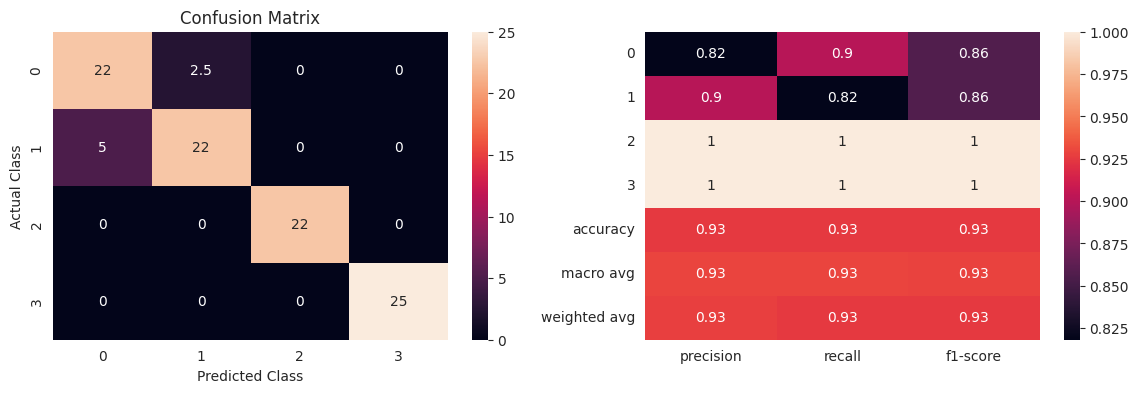

In [ ]:
con_mat = confusion_matrix(y_test,pred_knn)
plt.figure(figsize=(14,4)) 
plt.subplot(1,2,1)
sns.heatmap(con_mat/np.sum(con_mat)*100,annot =True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(classification_report(y_test,pred_knn,output_dict=True)).T.iloc[:,:-1], annot = True)

plt.show()

In [ ]:
#train score
score = accuracy_score(y_train, x_pred)
score

0.9875

In [ ]:
df_actors_combined.describe()

,x,n,freq
count,120.000000,112.000000,84.000000
mean,84.083333,546.401786,0.071783
std,361.367933,886.988116,0.118319
min,0.000000,0.000000,0.000000
25%,0.000000,6.750000,0.000000
50%,1.000000,57.000000,0.021855
75%,17.250000,564.250000,0.099593
max,2846.000000,2229.000000,0.666670


In [ ]:
df_actors_combined['enum'].unique()

array(['End-user', 'System admin', 'Cashier', 'Other', 'Executive',
       'Manager', 'Finance', 'Developer', 'Call center',
       'Doctor or nurse', 'Human resources', 'Auditor', 'Guard',
       'Helpdesk', 'Maintenance', 'Unknown', 'Organized crime',
       'Unaffiliated', 'Activist', 'State-affiliated', 'Former employee',
       'Nation-state', 'Customer', 'Force majeure', 'Competitor',
       'Acquaintance', 'Terrorist'], dtype=object)

In [ ]:
df=df_actors_combined.dropna()

In [ ]:
df

,by,enum,x,n,freq
0,actor.External,End-user,56,109.0,0.51376
1,actor.External,System admin,14,109.0,0.12844
2,actor.External,Cashier,11,109.0,0.10092
3,actor.External,Other,10,109.0,0.09174
4,actor.External,Executive,6,109.0,0.05505
...,...,...,...,...,...
36,actor.Partner,Force majeure,0,9.0,0.00000
37,actor.Partner,Former employee,0,9.0,0.00000
38,actor.Partner,Nation-state,0,9.0,0.00000
39,actor.Partner,Organized crime,0,9.0,0.00000


In [ ]:
pprint.pprint(v.enumerations)

{'action.environmental.variety': ['Deterioration',
                                  'Earthquake',
                                  'EMI',
                                  'ESD',
                                  'Fire',
                                  'Flood',
                                  'Hazmat',
                                  'Humidity',
                                  'Hurricane',
                                  'Ice',
                                  'Landslide',
                                  'Leak',
                                  'Lightning',
                                  'Meteorite',
                                  'Particulates',
                                  'Pathogen',
                                  'Power failure',
                                  'Temperature',
                                  'Tornado',
                                  'Tsunami',
                                  'Vermin',
                                  'Volcano'

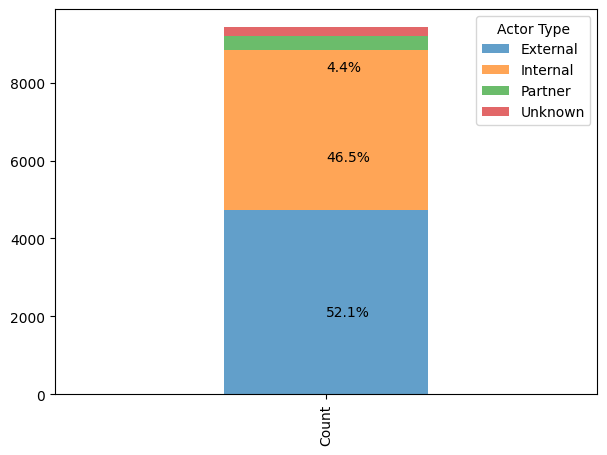

In [ ]:
actor = v.enum_summary(veris_df, 'actor')
actor = actor[['enum', 'x']]
actor.columns = ['Actor Type', 'Count']
fig1 = actor.set_index('Actor Type').T.plot(kind='bar', stacked=True, figsize=(7,5), alpha=0.7, label=None, grid=False, width = 0.3)
plt.annotate('46.5%', xy=[0,6000])
plt.annotate('52.1%', xy=[0,2000])
plt.annotate('4.4%', xy=[0,8300])
plt.show()

In [ ]:
actor

,Actor Type,Count
0,External,4722
1,Internal,4116
2,Partner,376
3,Unknown,212


In [ ]:
actor_freqs = v.enum_summary(veris_df, 'actor')
actor_freqs = actor_freqs[['enum', 'freq']]
actor_freqs['Percentage'] = actor_freqs['freq'].apply(lambda x: x*100)
actor_freqs

,enum,freq,Percentage
0,External,0.52795,52.795
1,Internal,0.46020,46.020
2,Partner,0.04204,4.204
3,Unknown,NaN,NaN


#Internal Actor

In [ ]:
internal_actor = v.enum_summary(veris_df, 'actor.internal.variety')
internal_actor.drop(internal_actor.index[15], inplace=True)
internal_actor = internal_actor[['enum', 'x']]
internal_actor.columns = ['Internal Actor Type', 'Count']
internal_actor = internal_actor.sort_values(by='Count', ascending=False)
internal_actor.head()

,Internal Actor Type,Count
0,End-user,792
1,System admin,319
2,Other,235
3,Developer,125
4,Executive,108


#External Actor

In [ ]:
external_actor = v.enum_summary(veris_df, 'actor.external.variety')
external_actor.drop(external_actor.index[13], inplace=True)
external_actor = external_actor[['enum', 'x']]
external_actor.columns = ['External Actor Type', 'Count']
external_actor = external_actor.sort_values(by='Count', ascending=False)
external_actor.drop(external_actor.index[12], inplace=True)

In [ ]:
external_actor.head()

,External Actor Type,Count
0,Organized crime,743
1,Unaffiliated,526
2,Activist,486
3,State-affiliated,221
4,Former employee,77


In [ ]:
internal_actor.set_index('Internal Actor Type').T

Internal Actor Type,End-user,System admin,Other,Developer,Executive,Cashier,Manager,Finance,Doctor or nurse,Human resources,Guard,Call center,Helpdesk,Maintenance,Auditor
Count,792,319,235,125,108,75,72,71,56,32,18,14,10,8,4


In [ ]:
df4 = actor.set_index('Actor Type').T
df5 = internal_actor.set_index('Internal Actor Type').T
df6 = external_actor.set_index('External Actor Type').T

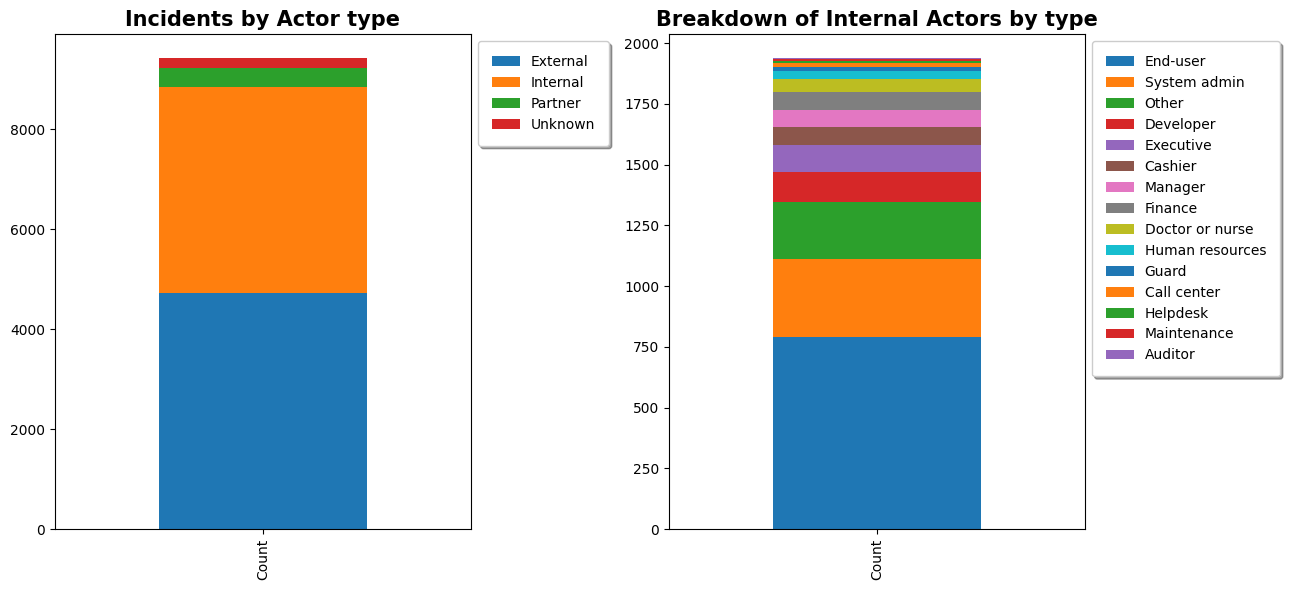

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,6))

df4.plot(kind='bar', stacked=True, ax=ax1, label='Count of Actor Types')
ax1.legend(bbox_to_anchor=(1,1), fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax1.set_title('Incidents by Actor type', fontweight='bold', fontsize='15')


df5.plot(kind='bar', stacked=True, ax=ax2)
ax2.legend(bbox_to_anchor=(1,1), fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.set_title('Breakdown of Internal Actors by type', fontweight='bold', fontsize='15')
fig.tight_layout()

plt.show()

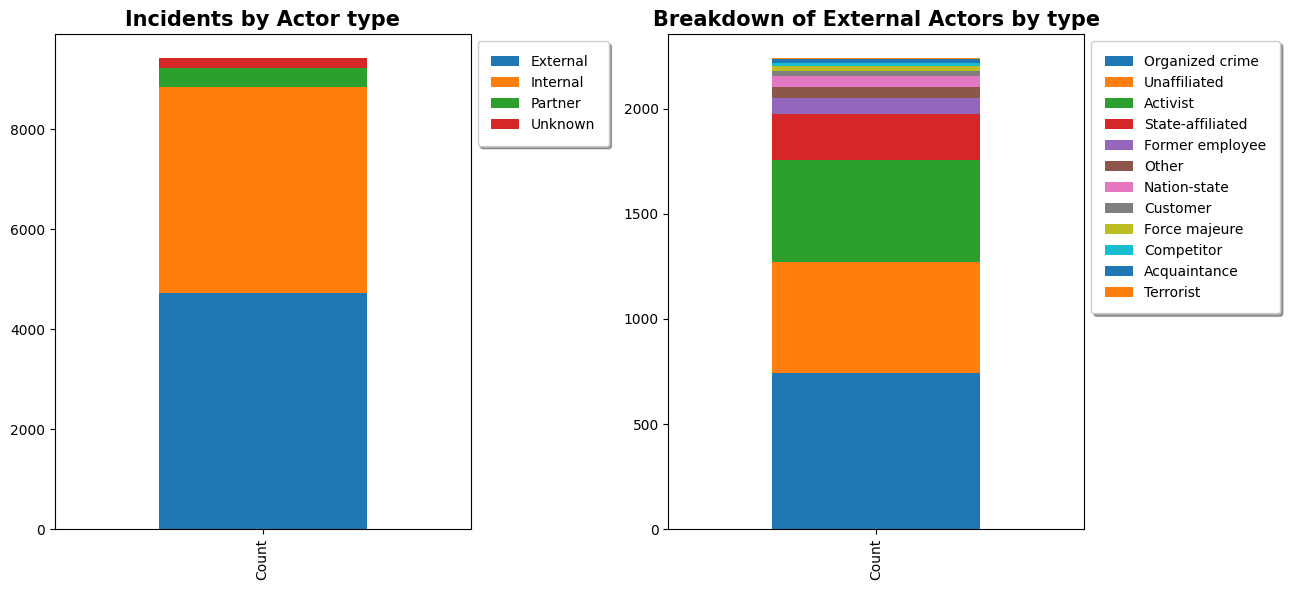

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(13,6))

df4.plot(kind='bar', stacked=True, ax=ax1, label='Count of Actor Types')
ax1.legend(bbox_to_anchor=(1,1), fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax1.set_title('Incidents by Actor type', fontweight='bold', fontsize='15')

df6.plot(kind='bar', stacked=True, ax=ax2)
ax2.legend(bbox_to_anchor=(1,1), fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax2.set_title('Breakdown of External Actors by type', fontweight='bold', fontsize='15')
fig.tight_layout()

plt.show()

In [ ]:
actor

,Actor Type,Count
0,External,4722
1,Internal,4116
2,Partner,376
3,Unknown,212


In [ ]:
action = v.enum_summary(veris_df, 'action')

In [ ]:
df_action = action[['enum', 'x']]
df_action.columns = ['Action', 'Count']
df_action['Count'].apply(pd.to_numeric, errors='coerce')
df_action['Count'].sum()
df_action

,Action,Count
0,Error,2673
1,Hacking,2502
2,Misuse,1788
3,Physical,1624
4,Malware,882
5,Social,637
6,Environmental,10
7,Unknown,232


In [ ]:
action_freqs = v.enum_summary(veris_df, 'action')
action_freqs = action_freqs[['enum', 'freq']]
action_freqs['Percentage'] = action_freqs['freq'].apply(lambda x: x*100)
action_freqs

,enum,freq,Percentage
0,Error,0.29953,29.953
1,Hacking,0.28037,28.037
2,Misuse,0.20036,20.036
3,Physical,0.18198,18.198
4,Malware,0.09883,9.883
5,Social,0.07138,7.138
6,Environmental,0.00112,0.112
7,Unknown,NaN,NaN


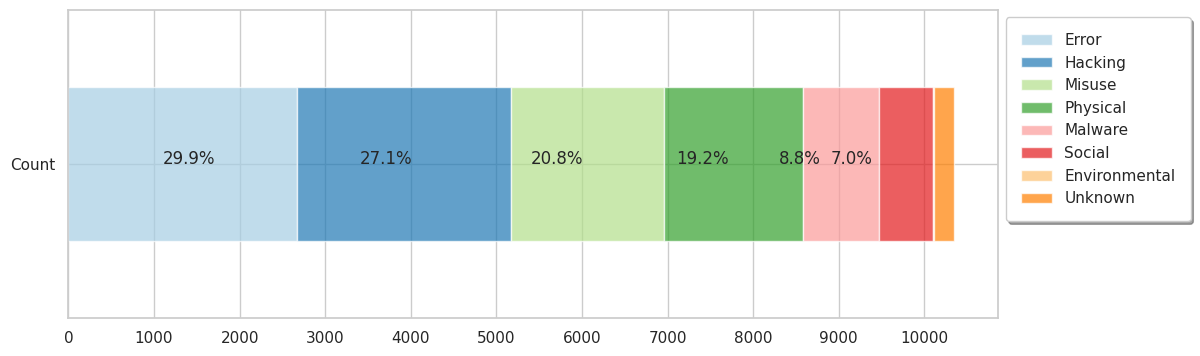

In [ ]:
import seaborn as sns
sns.set()
palette = sns.color_palette("Paired")
sns.set_palette('Paired')
sns.set_style('whitegrid')
df_action.set_index('Action').T.plot(kind='barh', stacked=True, figsize=(12,4), alpha=0.7, label=None)
x_ticks = np.arange(0, 11000, 1000)
plt.xticks(x_ticks)
plt.legend(bbox_to_anchor=(1, 1), loc=2, fancybox=True, framealpha=1, shadow=True, borderpad=1)
plt.annotate('29.9%', xy=[1100,0])
plt.annotate('27.1%', xy=[3400,0])
plt.annotate('20.8%', xy=[5400,0])
plt.annotate('19.2%', xy=[7100,0])
plt.annotate('8.8%', xy=[8300,0])
plt.annotate('7.0%', xy=[8900,0])
plt.show()

In [ ]:
df = px.data
df

<module 'plotly.express.data' from '/usr/local/lib/python3.9/dist-packages/plotly/express/data/__init__.py'>

In [ ]:
actor.info

<bound method DataFrame.info of   Actor Type  Count
0   External   4722
1   Internal   4116
2    Partner    376
3    Unknown    212>

In [ ]:
v.enum_summary(veris_df, 'action')

,enum,x,n,freq
0,Error,2673,8924.0,0.29953
1,Hacking,2502,8924.0,0.28037
2,Misuse,1788,8924.0,0.20036
3,Physical,1624,8924.0,0.18198
4,Malware,882,8924.0,0.09883
5,Social,637,8924.0,0.07138
6,Environmental,10,8924.0,0.00112
7,Unknown,232,NaN,NaN


In [ ]:
hacking = v.enum_summary(veris_df, 'action.hacking.variety')
hacking = hacking.drop(hacking[hacking.x < 5].index)
hacking

,enum,x,n,freq
0,Use of stolen creds,359,847.0,0.42385
1,Exploit vuln,271,847.0,0.31995
2,DoS,166,847.0,0.19599
3,Brute force,150,847.0,0.17710
4,SQLi,105,847.0,0.12397
5,Other,42,847.0,0.04959
6,Abuse of functionality,41,847.0,0.04841
7,Forced browsing,19,847.0,0.02243
8,MitM,8,847.0,0.00945
9,XSS,7,847.0,0.00826


In [ ]:
hacking['enum'].unique()

array(['Use of stolen creds', 'Exploit vuln', 'DoS', 'Brute force',
       'SQLi', 'Other', 'Abuse of functionality', 'Forced browsing',
       'MitM', 'XSS', 'Exploit misconfig', 'Buffer overflow',
       'Path traversal', 'Unknown'], dtype=object)

<Axes: ylabel='enum'>

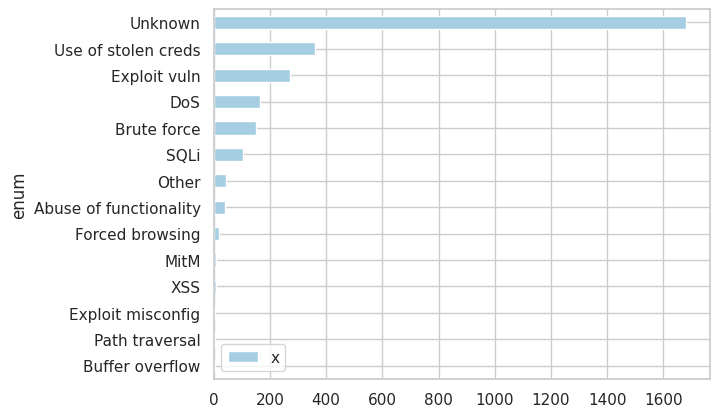

In [ ]:
hacking.sort_values(by='x', ascending=True).plot(x='enum', y='x', kind='barh')

In [ ]:
internal = v.enum_summary(veris_df, 'actor.internal.variety')
internal.head()

,enum,x,n,freq
0,End-user,792,1930.0,0.41036
1,System admin,319,1930.0,0.16528
2,Other,235,1930.0,0.12176
3,Developer,125,1930.0,0.06477
4,Executive,108,1930.0,0.05596


In [ ]:

v.enum_summary(veris_df, 'actor.external.variety')

,enum,x,n,freq
0,Organized crime,743,2229.0,0.33333
1,Unaffiliated,526,2229.0,0.23598
2,Activist,486,2229.0,0.21803
3,State-affiliated,221,2229.0,0.09915
4,Former employee,77,2229.0,0.03454
5,Other,53,2229.0,0.02378
6,Nation-state,51,2229.0,0.02288
7,Customer,24,2229.0,0.01077
8,Force majeure,22,2229.0,0.00987
9,Competitor,18,2229.0,0.00808


In [ ]:
timeline_info = veris_df[['timeline.incident.day', 'timeline.incident.month', 'timeline.incident.year']]
timeline_info = timeline_info.dropna(axis='rows')
timeline_info['timeline.incident.day'] = timeline_info['timeline.incident.day'].astype(int)
timeline_info['timeline.incident.month'] = timeline_info['timeline.incident.month'].astype(int)
timeline_info['timeline.incident.year'] = timeline_info['timeline.incident.year'].astype(int)

In [ ]:
timeline_info.head()

,timeline.incident.day,timeline.incident.month,timeline.incident.year
0,11,9,2015
4,28,10,2010
5,2,6,2010
9,5,12,2011
10,15,4,2015


In [ ]:
timeline_info['timeline.incident.day'] = timeline_info['timeline.incident.day'].astype(str)
timeline_info['timeline.incident.month'] = timeline_info['timeline.incident.month'].astype(str)
timeline_info['timeline.incident.year'] = timeline_info['timeline.incident.year'].astype(str)

In [ ]:
timeline_info['combined date']=timeline_info['timeline.incident.year']+'-'+timeline_info['timeline.incident.month']+'-'+timeline_info['timeline.incident.day']

In [ ]:
timeline_info.head()

,timeline.incident.day,timeline.incident.month,timeline.incident.year,combined date
0,11,9,2015,2015-9-11
4,28,10,2010,2010-10-28
5,2,6,2010,2010-6-2
9,5,12,2011,2011-12-5
10,15,4,2015,2015-4-15


In [ ]:
incorrect_dates = timeline_info[timeline_info['combined date'] == '2018-2-29'].index
timeline_info.drop(incorrect_dates , inplace=True)

In [ ]:
timeline_info['combined date'] = pd.to_datetime(timeline_info['combined date'])
timeline_info = timeline_info.drop(['timeline.incident.day', 'timeline.incident.month','timeline.incident.year'], axis=1)

In [ ]:
timeline_info.dtypes

combined date    datetime64[ns]
dtype: object

In [ ]:
timeline_info.describe()

<ipython-input-50-ee3e5b0d2329>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  timeline_info.describe()


,combined date
count,4269
unique,2198
top,2010-02-22 00:00:00
freq,32
first,1971-03-08 00:00:00
last,2022-03-19 00:00:00


<ipython-input-51-64c1c40259a9>:3: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Hacking = df2['2006':'2019']


<Axes: xlabel='combined date'>

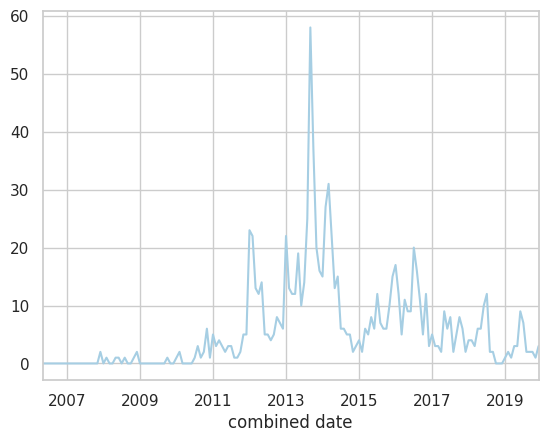

In [ ]:
df2 = timeline_info.join(veris_df)
df2 = df2.set_index('combined date')
Hacking = df2['2006':'2019']
Hacking= Hacking['action.Hacking']
Hacking.resample('M').sum().plot(kind='line')

In [ ]:
Hacking_Variety = df2.filter(like='action.hacking.variety')
Hacking_Variety = Hacking_Variety['2006':'2019']

<ipython-input-52-929c6b52a4f6>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  Hacking_Variety = Hacking_Variety['2006':'2019']


In [ ]:
column_list= Hacking_Variety.loc[:, Hacking_Variety.sum()> 4].sum().sort_values(ascending=False).index.to_list()

In [ ]:
HV = Hacking_Variety.loc[:, column_list].resample('Y').sum()
HV.rename(columns={'combined date':'Combined Date', 'action.hacking.variety.Unknown':'Unkown', 'action.hacking.variety.DoS':'DoS', 'action.hacking.variety.Exploit vuln': 'Exploit Vuln', 'action.hacking.variety.Use of stolen creds':'Stolen Creds', 'action.hacking.variety.SQLi':'SQLi', 'action.hacking.variety.Other':'Other', 'action.hacking.variety.Brute force':'Brute Force', 'action.hacking.variety.Use of backdoor or C2': 'Backdoor or C2', 'action.hacking.variety.Abuse of functionality': 'Abuse of functionality'}, inplace=True)
HV.head()

,Unkown,DoS,Stolen Creds,Exploit Vuln,SQLi,Brute Force,Other,Abuse of functionality
combined date,,,,,,,,
2006-12-31,0,0,0,0,0,0,0,0
2007-12-31,1,0,0,1,1,0,0,0
2008-12-31,2,0,2,3,1,0,1,0
2009-12-31,1,0,0,0,0,0,0,0
2010-12-31,16,0,1,0,0,0,0,0


In [ ]:
size = v.enum_summary(veris_df, 'victim.employee_count')

In [ ]:
size

,enum,x,n,freq
0,1001 to 10000,1292,6329.0,0.20414
1,101 to 1000,1128,6329.0,0.17823
2,Over 100000,1069,6329.0,0.16891
3,11 to 100,837,6329.0,0.13225
4,10001 to 25000,459,6329.0,0.07252
5,Small,458,6329.0,0.07237
6,1 to 10,451,6329.0,0.07126
7,Large,274,6329.0,0.04329
8,25001 to 50000,223,6329.0,0.03523
9,50001 to 100000,138,6329.0,0.02180


#SVM df_actors_combined

In [ ]:
df_actors_combined.head()

,by,enum,x,n,freq
0,actor.External,End-user,56,109.0,0.51376
1,actor.External,System admin,14,109.0,0.12844
2,actor.External,Cashier,11,109.0,0.10092
3,actor.External,Other,10,109.0,0.09174
4,actor.External,Executive,6,109.0,0.05505


In [ ]:
import missingno as msno

In [ ]:
import matplotlib.pyplot as plt

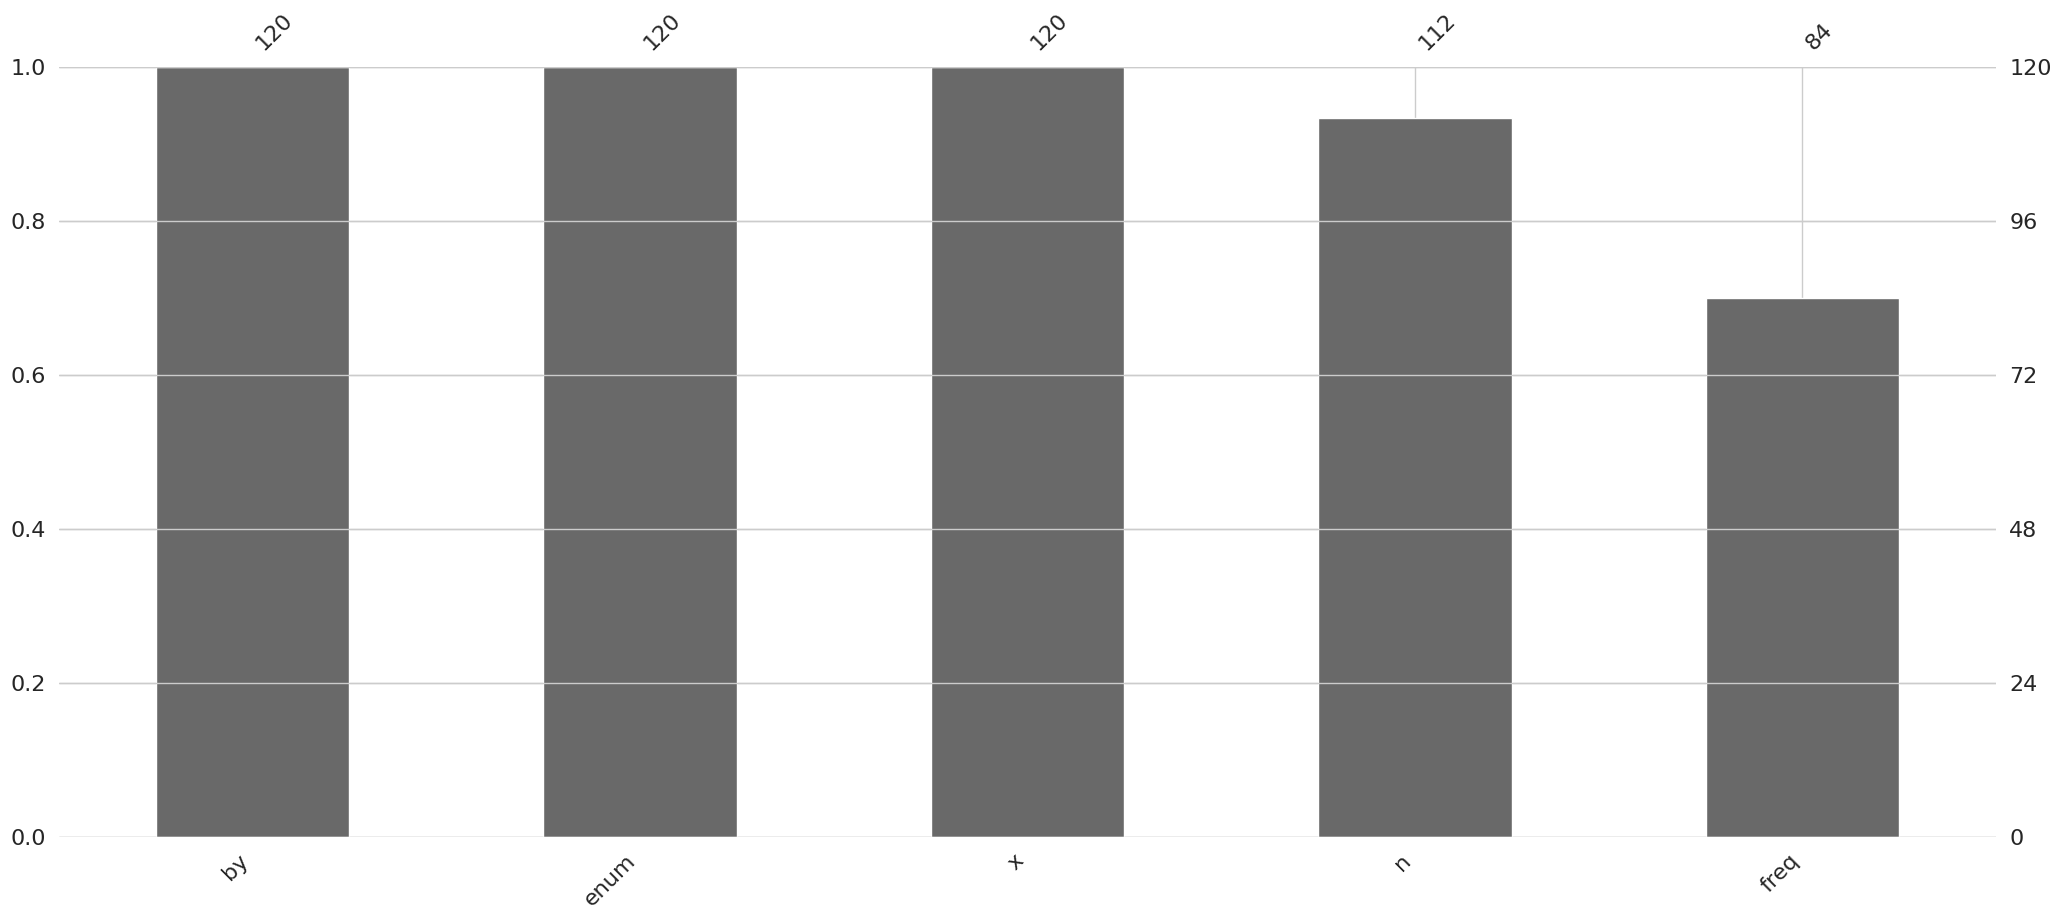

In [ ]:
msno.bar(df_actors_combined)
plt.show()

<ipython-input-61-83e9cc825de7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_actors_combined.corr()


Text(0.5, 1.0, 'Correlation ')

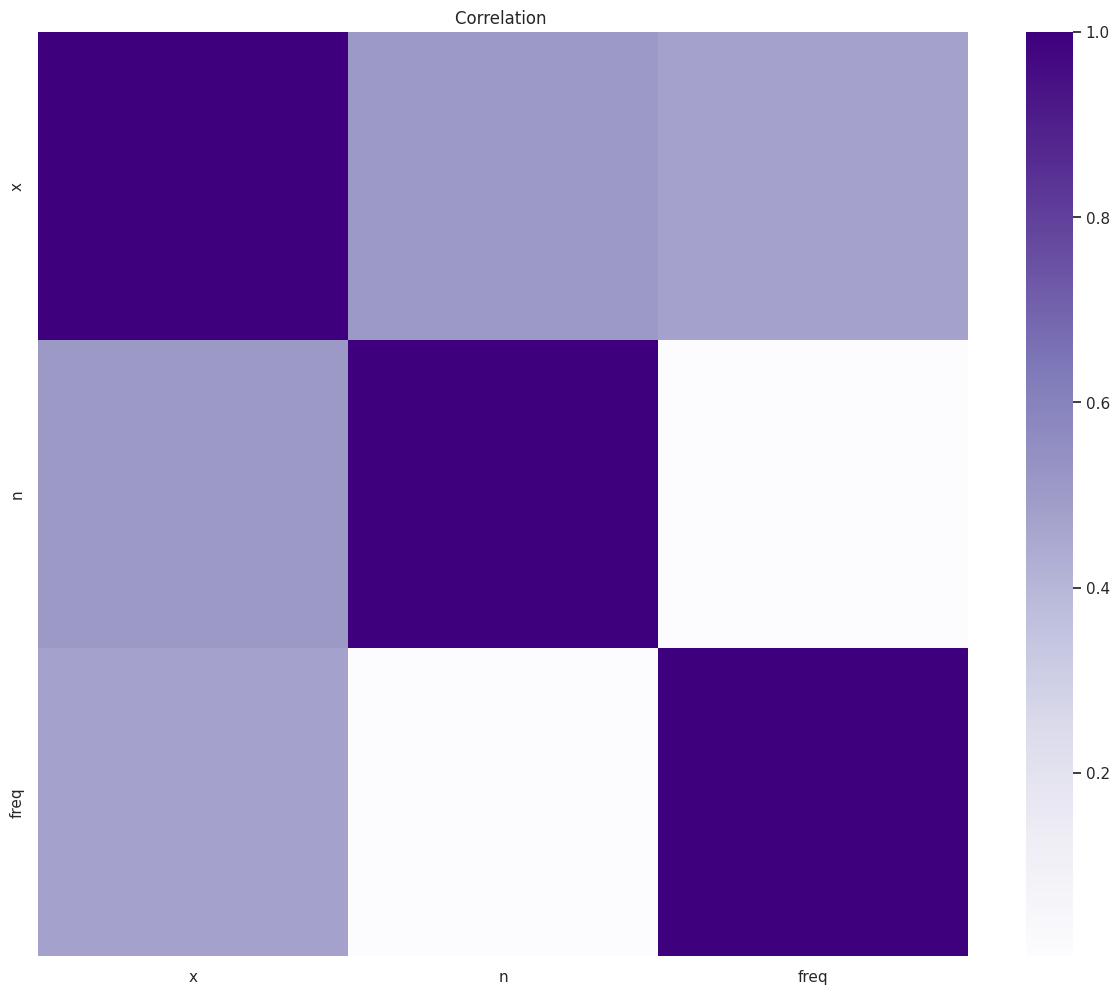

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr=df_actors_combined.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='Purples')
r.set_title("Correlation ")

In [ ]:
internal.columns

Index(['enum', 'x', 'n', 'freq'], dtype='object')

In [ ]:
internal['enum'].unique

<bound method Series.unique of 0            End-user
1        System admin
2               Other
3           Developer
4           Executive
5             Cashier
6             Manager
7             Finance
8     Doctor or nurse
9     Human resources
10              Guard
11        Call center
12           Helpdesk
13        Maintenance
14            Auditor
15            Unknown
Name: enum, dtype: object>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [ ]:
!pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 2.8 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce
import pandas as pd

In [ ]:
scaler=StandardScaler()

In [ ]:
df_actors_combined.head()

,by,enum,x,n,freq
0,actor.External,End-user,56,109.0,0.51376
1,actor.External,System admin,14,109.0,0.12844
2,actor.External,Cashier,11,109.0,0.10092
3,actor.External,Other,10,109.0,0.09174
4,actor.External,Executive,6,109.0,0.05505


In [ ]:
df_actors_combined['enum'].unique()

array(['End-user', 'System admin', 'Cashier', 'Other', 'Executive',
       'Manager', 'Finance', 'Developer', 'Call center',
       'Doctor or nurse', 'Human resources', 'Auditor', 'Guard',
       'Helpdesk', 'Maintenance', 'Unknown', 'Organized crime',
       'Unaffiliated', 'Activist', 'State-affiliated', 'Former employee',
       'Nation-state', 'Customer', 'Force majeure', 'Competitor',
       'Acquaintance', 'Terrorist'], dtype=object)

In [ ]:
X=df_actors_combined.drop(columns=["enum","by"])

In [ ]:
y=df_actors_combined["by"]

In [ ]:
y

0     actor.External
1     actor.External
2     actor.External
3     actor.External
4     actor.External
           ...      
51     actor.Unknown
52     actor.Unknown
53     actor.Unknown
54     actor.Unknown
55     actor.Unknown
Name: by, Length: 120, dtype: object

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
X

array([[-0.07803981, -0.49534784,  3.75790713],
       [-0.19475216, -0.49534784,  0.48172779],
       [-0.20308876, -0.49534784,  0.24773927],
       [-0.20586762, -0.49534784,  0.16968641],
       [-0.21698308, -0.49534784, -0.14226993],
       [-0.21698308, -0.49534784, -0.14226993],
       [-0.22531968, -0.49534784, -0.37634348],
       [-0.22809855, -0.49534784, -0.45431131],
       [-0.23087741, -0.49534784, -0.53236416],
       [-0.23087741, -0.49534784, -0.53236416],
       [-0.23087741, -0.49534784, -0.53236416],
       [-0.23365628, -0.49534784, -0.61033199],
       [-0.23365628, -0.49534784, -0.61033199],
       [-0.23365628, -0.49534784, -0.61033199],
       [-0.23365628, -0.49534784, -0.61033199],
       [ 0.08313439,         nan,         nan],
       [ 1.96720522,  1.56689435,  2.87874969],
       [ 0.65280183,  1.56689435,  0.79495951],
       [ 0.41937712,  1.56689435,  0.42493116],
       [ 0.11370191,  1.56689435, -0.05962573],
       [ 0.0664612 ,  1.56689435, -0.134

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
%%time 

one=OneHotEncoder()

one.fit(X)
train=one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 120 rows and 102 columns
CPU times: user 2.91 ms, sys: 0 ns, total: 2.91 ms
Wall time: 7.45 ms


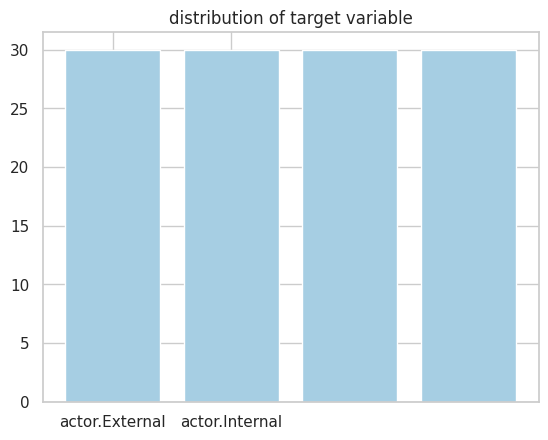

In [ ]:
x=y.value_counts()
plt.bar(x.index,x)
plt.gca().set_xticks([0,1])
plt.title('distribution of target variable')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def logistic(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pre=lr.predict(X_test)
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_pre,y_test)
    print(cm)
    import seaborn as sn
    sn.heatmap(cm,annot=True)
    print('Accuracy : ',accuracy_score(y_test,y_pre))

[[8 2 1 0]
 [0 4 0 0]
 [0 0 5 0]
 [0 0 0 4]]
Accuracy :  0.875


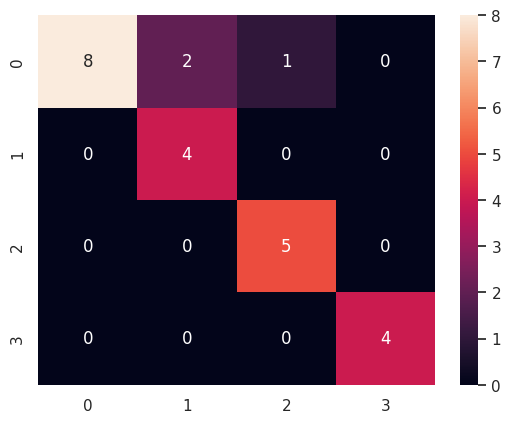

In [ ]:
logistic(train,y)

In [ ]:
hacking.head()

,enum,x,n,freq
0,Use of stolen creds,359,847.0,0.42385
1,Exploit vuln,271,847.0,0.31995
2,DoS,166,847.0,0.19599
3,Brute force,150,847.0,0.17710
4,SQLi,105,847.0,0.12397


In [ ]:
hacking.head(54)

,enum,x,n,freq
0,Use of stolen creds,359,847.0,0.42385
1,Exploit vuln,271,847.0,0.31995
2,DoS,166,847.0,0.19599
3,Brute force,150,847.0,0.17710
4,SQLi,105,847.0,0.12397
5,Other,42,847.0,0.04959
6,Abuse of functionality,41,847.0,0.04841
7,Forced browsing,19,847.0,0.02243
8,MitM,8,847.0,0.00945
9,XSS,7,847.0,0.00826


In [ ]:
for i in ["x","n","freq"]:
    hacking[i].fillna(hacking[i].mode()[0],inplace=True)

In [ ]:
hacking.head()

,enum,x,n,freq
0,Use of stolen creds,359,847.0,0.42385
1,Exploit vuln,271,847.0,0.31995
2,DoS,166,847.0,0.19599
3,Brute force,150,847.0,0.17710
4,SQLi,105,847.0,0.12397


In [ ]:
lrmodel = LogisticRegression()

lrmodel.fit(X_train,Y_train)

lr_predict = lrmodel.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_test,lr_predict,zero_division='warn'))

                     precision    recall  f1-score   support

    Buffer overflow       0.00      0.00      0.00       1.0
       Exploit vuln       0.00      0.00      0.00       0.0
     Path traversal       0.00      0.00      0.00       0.0
Use of stolen creds       0.00      0.00      0.00       1.0
                XSS       0.00      0.00      0.00       1.0

           accuracy                           0.00       3.0
          macro avg       0.00      0.00      0.00       3.0
       weighted avg       0.00      0.00      0.00       3.0



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
X = hacking.drop(['enum'],axis = 'columns')
Y = hacking['enum']

In [ ]:
for i in ["x","n","freq"]:
    X[i].fillna(X[i].mode()[0],inplace=True)

In [ ]:
X

,x,n,freq
0,359,847.0,0.42385
1,271,847.0,0.31995
2,166,847.0,0.19599
3,150,847.0,0.17710
4,105,847.0,0.12397
5,42,847.0,0.04959
6,41,847.0,0.04841
7,19,847.0,0.02243
8,8,847.0,0.00945
9,7,847.0,0.00826


In [ ]:
Y

0        Use of stolen creds
1               Exploit vuln
2                        DoS
3                Brute force
4                       SQLi
5                      Other
6     Abuse of functionality
7            Forced browsing
8                       MitM
9                        XSS
10         Exploit misconfig
11           Buffer overflow
12            Path traversal
54                   Unknown
Name: enum, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
X_train.isna().any(
)

x       False
n       False
freq    False
dtype: bool

In [ ]:
X_test.isna().any()

x       False
n       False
freq    False
dtype: bool

In [ ]:
dt.score(X_test,Y_test)

0.0

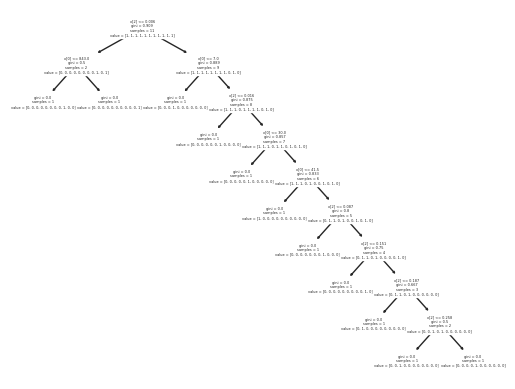

In [ ]:
from sklearn.tree import plot_tree
graph = plot_tree(dt)

In [ ]:
y_pred = dt.predict(X_test,Y_test)

ValueError: ignored

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=42) 

In [ ]:
dt.fit(X_train,Y_train)

ValueError: ignored

In [ ]:
print(cm)

NameError: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pre,y_test)
cm

NameError: ignored

In [ ]:
df_actors_combined.head()

#NLP --> TF-IDF
1. Tokenization
2. str to int 
3. Model training
4. Logistic Regression
5. DT
6. Random Forest

Internal dataframe

In [ ]:
internal.head()

In [ ]:
internal.info()

In [ ]:
internal.isnull().values.any()



drop enum

In [ ]:
internal.drop(['enum'],inplace=True,axis=1)
internal.head()



In [ ]:
internal.head()

In [ ]:
df = internal

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
nan_percentage = df.isna().sum() * 100 / len(df)
missing_percentage_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': nan_percentage}).reset_index(drop=True)
missing_percentage_df

In [ ]:
sns.pairplot(df) 



In [ ]:
df.corr() 



In [ ]:
df.skew() 



In [ ]:
df.kurtosis() 



In [ ]:
for i in ["x","n","freq"]:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [ ]:
df.isnull().sum().sum() 



In [ ]:
from sklearn.model_selection import train_test_split 

In [ ]:
df.head()



In [ ]:
df.shape

In [ ]:
X=df.drop(columns=["freq"],axis=1)
X["n"]=X["n"].astype("int") 

In [ ]:
y=df["freq"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42) 



In [ ]:
print("X_train row number :",X_train.shape[0])

In [ ]:
print("X_test row number :",X_test.shape[0])

In [ ]:
print("y_train row number :",y_train.shape[0])

In [ ]:
print("y_test row number :",y_test.shape[0])



In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
df_out=df.copy()
clf.fit_predict(df_out)
df_scores = clf.negative_outlier_factor_
np.sort(df_scores)[0:25]
